<a href="https://colab.research.google.com/github/sumeet6510/Rossmann-Sales-Prediction/blob/main/Individual_notebook_Rossmann_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
File_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone Project/Capstone Project 2/Dat/'
rossmann_df = pd.read_csv(File_directory + 'Rossmann Stores Data.csv')
store_df = pd.read_csv(File_directory + 'store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossmann_df.shape

(1017209, 9)

In [ ]:
rossmann_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.shape

(1115, 10)

In [ ]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

## Looking for Nan values in Store csv file

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many Nan values in columns - **'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'**. Also **CompetitionDistance** has only 3 null values. we have to clean those data. Let's start checking....

### 1. CompetitionDistance

In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


So, we can fill these three values with many ways such as 0 or mean or mode or median. We decided to fill with it Mode.

In [ ]:
## code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

### 2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'

There are not much information provided to these data. Also we observe from dataset that where the **Promo2** has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [ ]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [ ]:
final1 = pd.merge(rossmann_df, store_new, on='Store', how='left')
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
final1.shape

(1017209, 18)

## Changing different dtypes to int type.

In [ ]:
# code for changing StateHoliday dtype from object to int.
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

print('levels :', final1['StateHoliday'].unique(), '; data type :', final1['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# code for changing Assortment dtype from object to int.
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

print('levels :', final1['Assortment'].unique(), '; data type :', final1['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

print('levels :', final1['StoreType'].unique(), '; data type :', final1['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [ ]:
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)

In [ ]:
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [ ]:
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

## checking dtypes of columns

In [ ]:
final1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

# Exploratory Data Analysis

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


Checking the description of the Final dataset

In [ ]:
final1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5422.02,5.85,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7706.92,3.33,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,710.00,3.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2325.00,6.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


### Sales

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

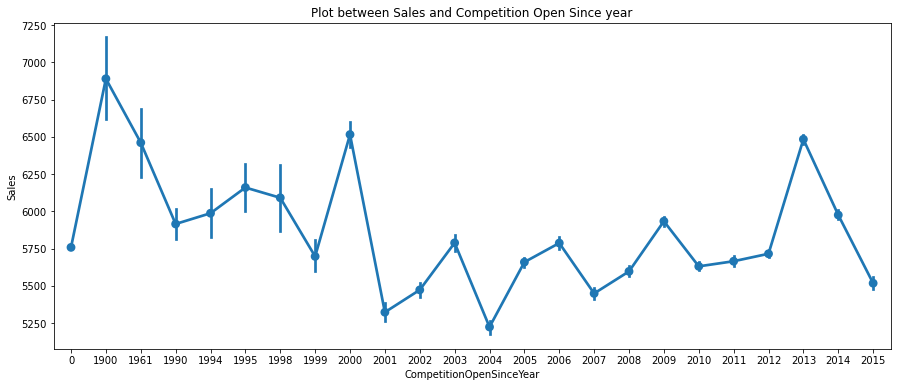

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since year')

From the Plot we can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

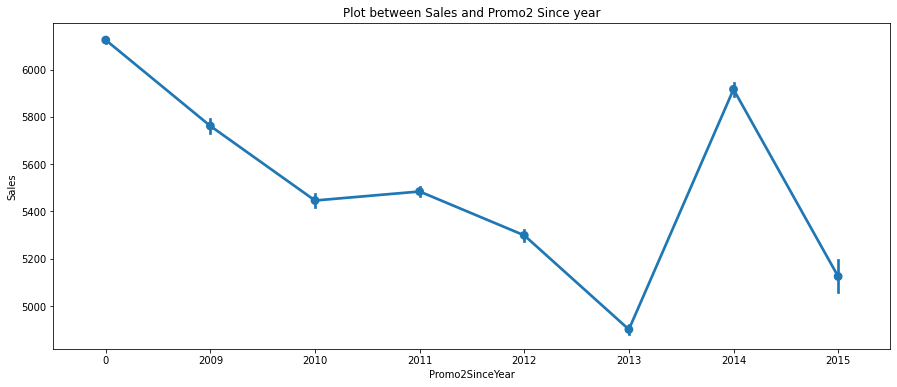

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Promo2 Since year')

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015.
Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

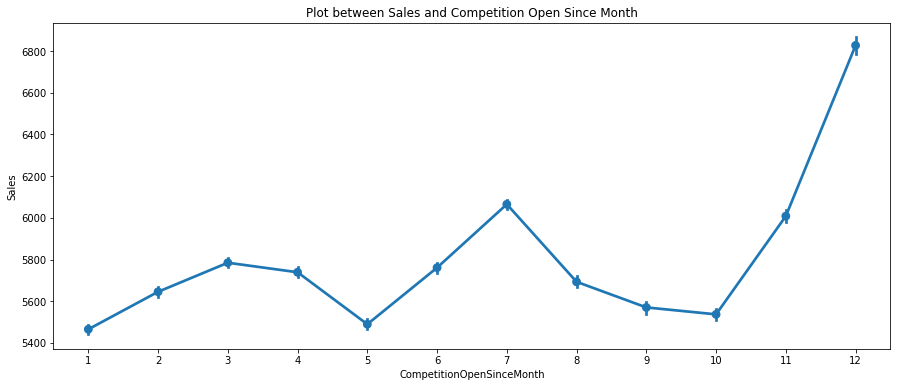

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

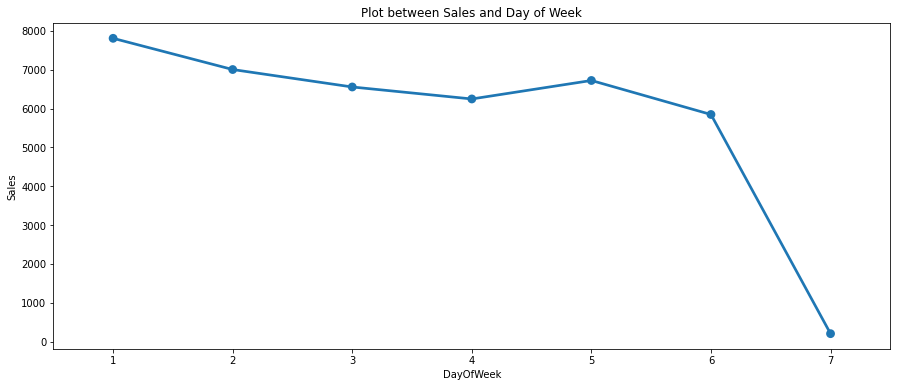

In [ ]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

## BoxPlot of sales between Assortment and store type

In [ ]:
#sns.catplot(data= final1, x= 'CompetitionOpenSinceMonth', y= 'Customers', col='StoreType', palette='plasma',
  #                             hue= 'StoreType', row='Promo', color= 'c')

Text(0.5, 1.0, 'Boxplot For Sales Values')

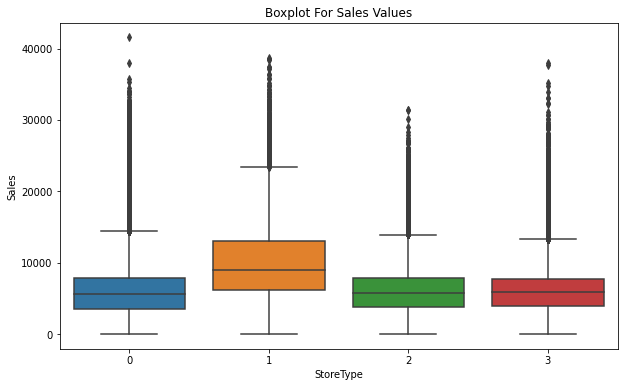

In [ ]:
plt.figure(figsize=(10, 6))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

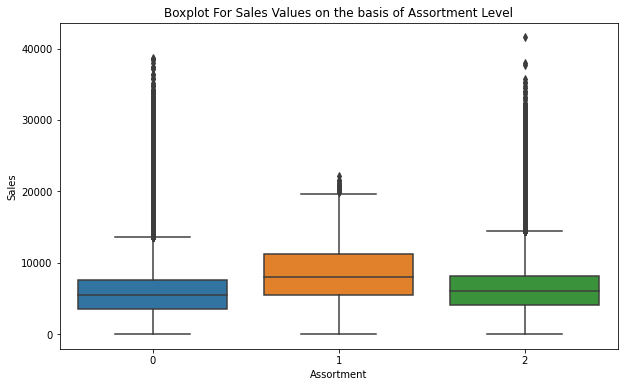

In [ ]:
plt.figure(figsize=(10, 6))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

### Plot between **Dayof Week** and **Open & promo**.

Text(0.5, 1.0, 'Store Daily Open Countplot')

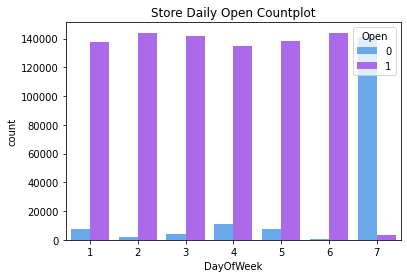

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='cool')
plt.title('Store Daily Open Countplot')

Here 0 means store is closed and 1 means store is open. Plot shows that on 7th day of week i.e. on Sunday almost every store is closed.

Text(0.5, 1.0, 'Store Daily Promo Countplot')

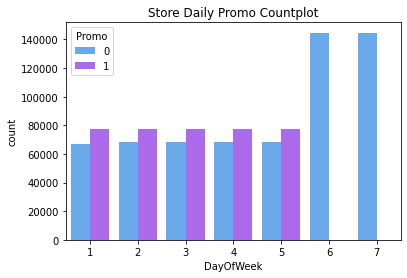

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final1, palette='cool')
plt.title('Store Daily Promo Countplot')

## Promo

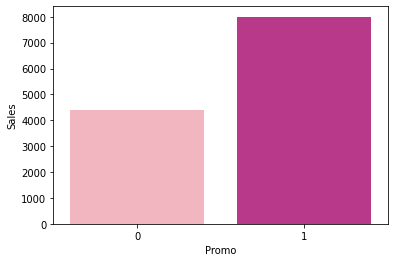

In [ ]:
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='RdPu')


Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

## StateHoliday and SchoolHoliday

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

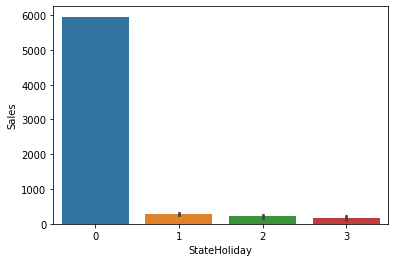

In [ ]:
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1)


Sales during school holiday

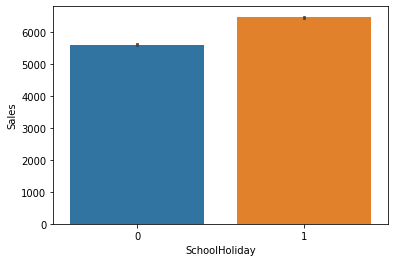

In [ ]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1)


We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.
Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

## Store Type

In [ ]:
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

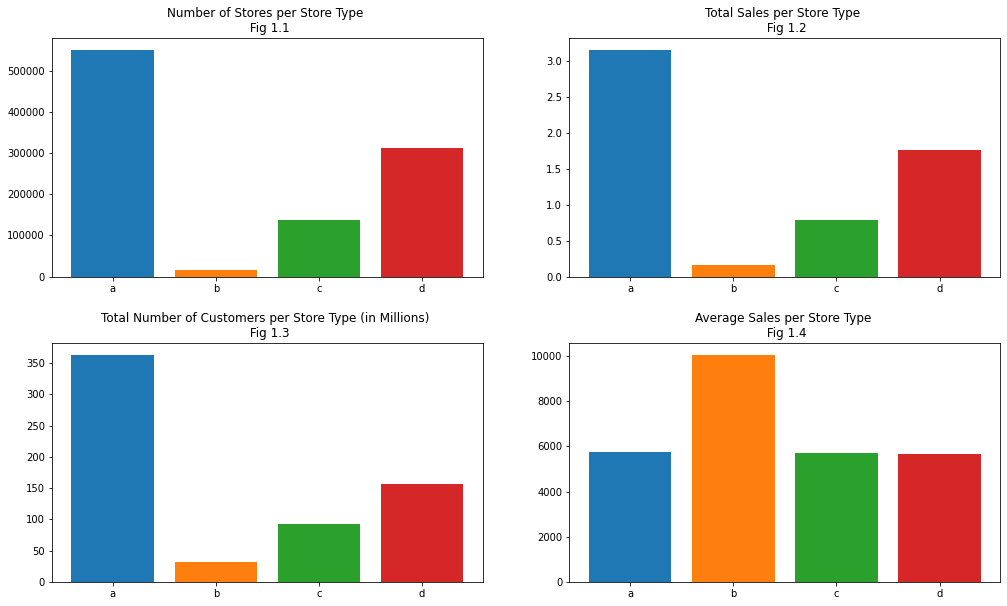

In [ ]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.


### Assortments

As we cited in the description, assortments have three types and each store has a defined type and assortment type:

1. a means basic things
2. b means extra things
3. c means extended things so the highest variety of products.

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

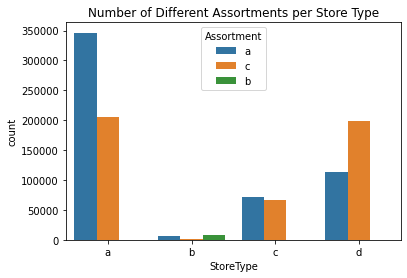

In [ ]:
Storetype_Assortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=merged_df,palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortments per Store Type")
merged_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

We can clearly see here that most of the stores have either a assortment type or c assortment type.
Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.

## Conclusions from EDA

1. There are two datasets - **1) Rossmann.csv  & 2) Store.csv**
2. shape of Rossmann dataset = (1017209,8)
   shape of store dataset = (1115, 10)
3. In both dataset **'Store'** column is common. So we do inner join on the basis of column **'Store'**.
4. On looking on datasets we find lots of **Nan** values in **Store dataset**.
5. Try to replace **Nan** values with suitable values. In CompetitionDistance column only 3 Nan values are there. So we replaced it with median. 
6. Now for rest columns(**CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, Promointerval**) there are lots of Nan values and best way to treat this values to replace with **0**. 
7. After combining shape of final dataset = (1017209,18)
8. Also there is some columns such as **'StateHoliday', 'SchoolHoliday' & 'Assortment'** which contains object values. So, try to change into int by giving suitable values.

we also did some graphs analysis and conclusions we got are:-
1. From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December. This may be due to Christmas eve and New Year.
2. From plot Sales and day of week, Sales highest on Monday and start declinig from tuesday to saturday and on Sunday Sales almost near to Zero. This is because on Sunday all stores be closed.
3. Plot between promotion and Sales  shows that promotion helps in increasing Sales. This similar trends also shows with customers.
4. Plot between StateHolidays and sales shows that during Public holiday sales are actually high but for other holidays such as Easter and Christmas sales be very low. This is because During Easter and Christmas stores also closed so sales goes down.


# Feature Engineering

## Correlation

In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']

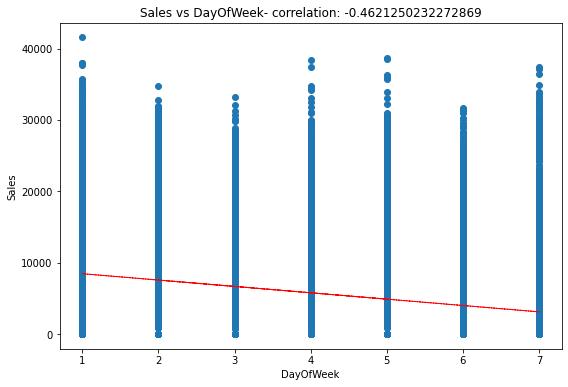

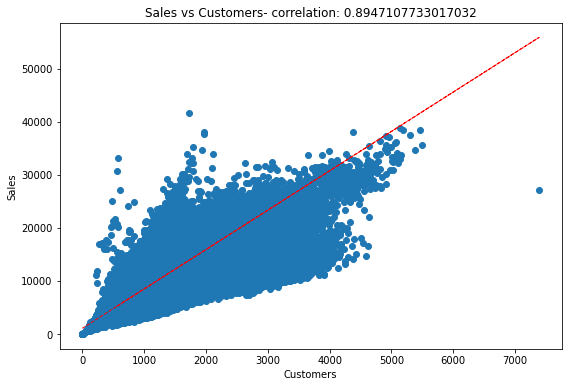

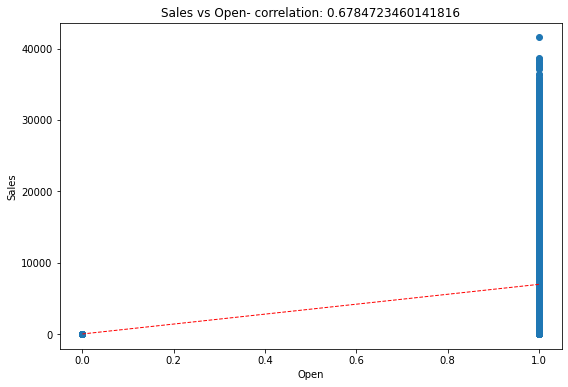

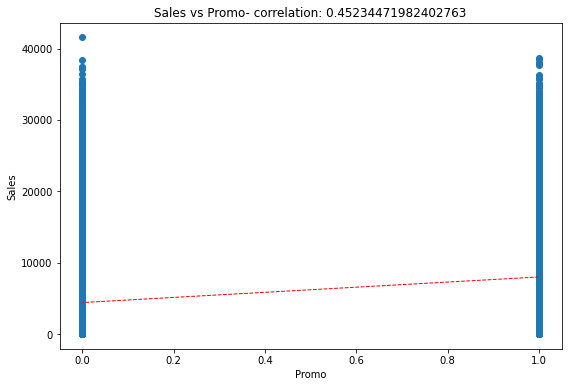

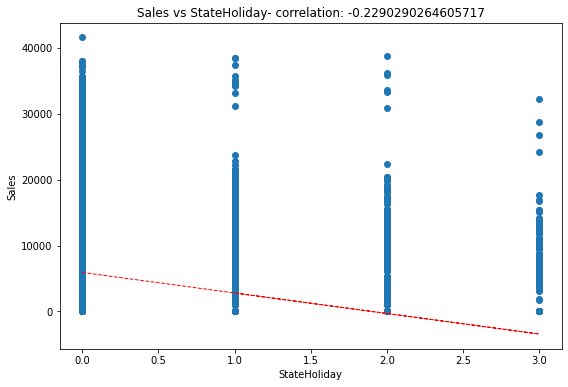

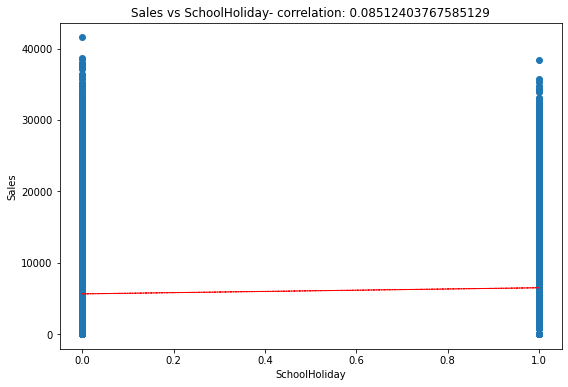

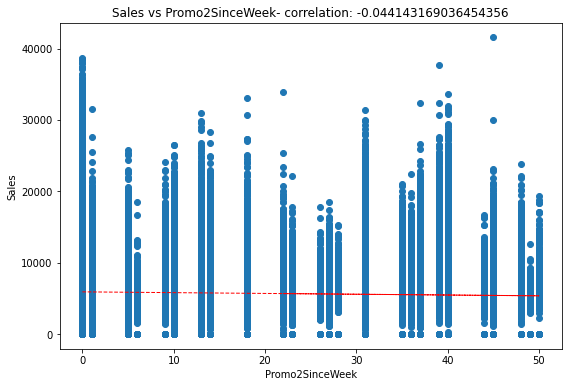

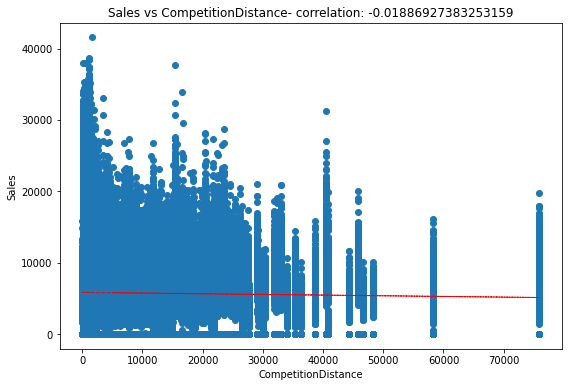

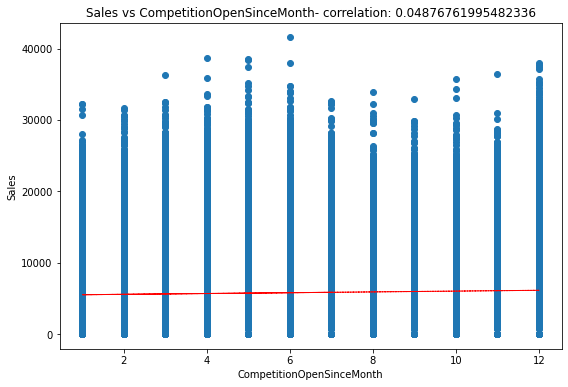

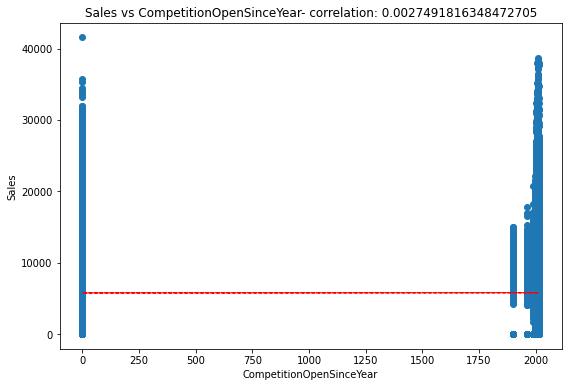

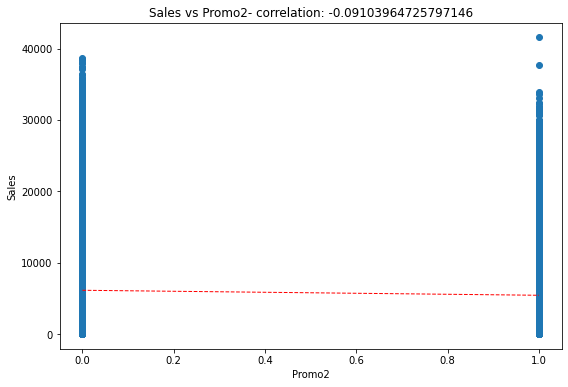

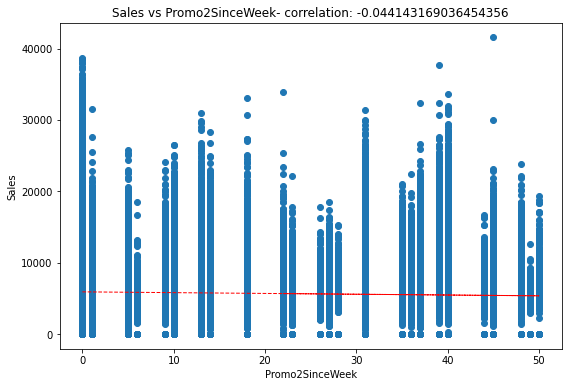

In [ ]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final1[col]
    label = final1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final1[col], final1['Sales'], 1)
    y_hat = np.poly1d(z)(final1[col])

    plt.plot(final1[col], y_hat, "r--", lw=1)

plt.show()

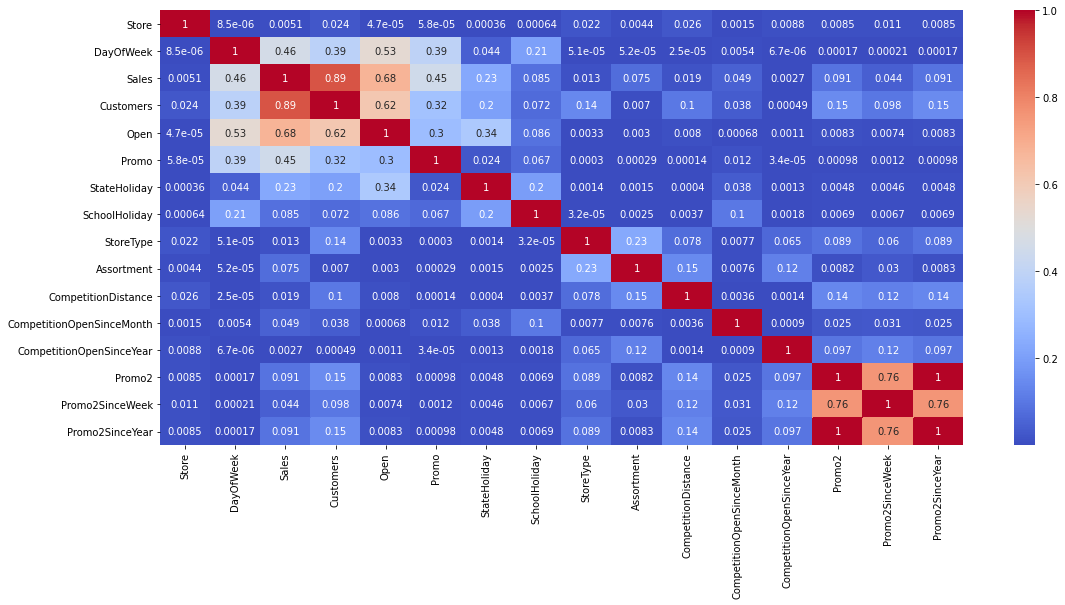

In [ ]:
 ## Correlation
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698849e+00
1,DayOfWeek,4.105225e+00
2,Customers,5.237282e+00
3,Open,9.376848e+00
4,Promo,1.917234e+00
5,StateHoliday,1.187994e+00
6,SchoolHoliday,1.330849e+00
7,StoreType,1.940349e+00
8,Assortment,2.045194e+00
9,CompetitionDistance,1.591292e+00


In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2SinceYear']]])

,variables,VIF
0,Store,3.696403
1,DayOfWeek,4.104888
2,Customers,5.236788
3,Open,9.375773
4,Promo,1.917192
5,StateHoliday,1.187994
6,SchoolHoliday,1.330832
7,StoreType,1.934515
8,Assortment,2.039582
9,CompetitionDistance,1.584854


Now for each feature VIF values below 10. That's look pretty fine.

## Analysis on Sales - Dependent variable

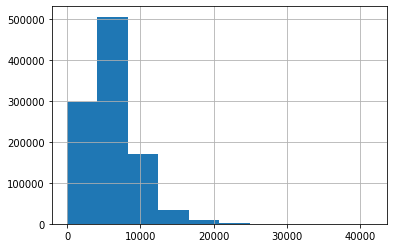

In [ ]:
pd.Series(final1['Sales']).hist()
plt.show()

Now checking for number of sales =0.

In [ ]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817

 We see that **172817** times store is were temporarily closed for refurbishment. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

In [ ]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
new_df.shape

(844392, 18)

PromoInterval to be changed into dummies as it is categorical feature.

In [ ]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,1,0,0,0


# Summary

Rossmann Sales prediction project is made by myself and my teammate - shafil.
When we look the problem statement and the dataset, firstly we discuss about problem statement and the approach to do this project. I took the part for doing EDA and do feature engineering. For model formulation and training model with various algorithms to get best model, this part is done by my mate Shafil.

Now, after looking datasets i can found that there were two datasets are given. the first dataset is of **Rossmann Stores Data.csv** - which contains the historical data including Sales and the second dataset contain **store.csv** - which has supplemental information about the stores.

The Shape of the **Rossmann Stores Data.csv is (1017209,9)** and shape of the **store.csv is (1115,10)**. On looking for Nan values, I found that Store dataset has lots of Nan values. So I try to replacing this Nan values with suitable values and makes datasets good. 

After that I tried to merge the both datasets into single, so Store column is common to both the datasets, I tried to join the datasets by inner join. Now I obtained final datasets which have now shape (1017209,18). After getting this dataset I do EDA on it and got very useful results which was shown in this notebook. 